# Doporučovací systém

In [1]:
import datetime
import pandas as pd
from sklearn.tree import DecisionTreeClassifier  
from joblib import load

### Načtení modelu

In [2]:
decision_tree_clf = load('model/decision_tree.joblib')

### Zisk aktuálního času a dne ze systému

In [3]:
current_time = datetime.datetime.now()
print(f'Aktuální čas je {current_time}')

decimal_time = current_time.hour + current_time.minute / 60.0
day_of_week = current_time.weekday() 
input_features = pd.DataFrame([[decimal_time, day_of_week]],
                              columns=['DecimalTime', 'DayOfWeek'])

Aktuální čas je 2024-04-09 23:19:58.552249


### Doporučení kamery

In [4]:
predicted_camera = decision_tree_clf.predict(input_features)
predicted_camera = predicted_camera[0]
print(f'Doporučená kamera je kamera {predicted_camera}.')

Doporučená kamera je kamera 2.


### Zobrazení snímku z doporučené kamery.

Doporučený stream najdete na url: https://www.zoopraha.cz/multimedia/prenos-z-udoli-slonu-zive?cam=5&res=h&start=5


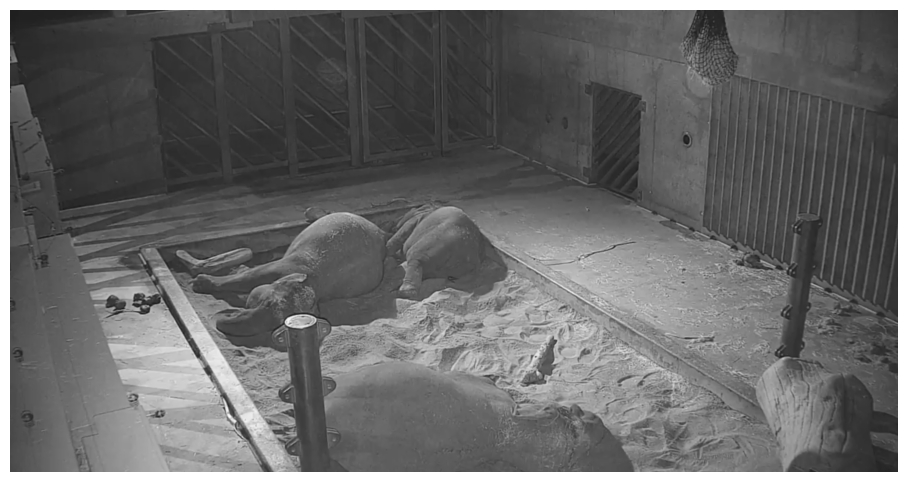

In [5]:
from scraping.scraping import scrape_one_stream_whole, BUTTON_NUM_TO_STREAM
from visualize.helper import plot_images
import os
import cv2


OUTPUT_DIR = 'output_recommend'
scrape_one_stream_whole(OUTPUT_DIR, predicted_camera)

files = os.listdir(OUTPUT_DIR)
filename = files[0]
filepath = os.path.join(OUTPUT_DIR, filename)
recommended_image = cv2.imread(filepath)
plot_images(recommended_image)

stream_num = BUTTON_NUM_TO_STREAM[predicted_camera]
url = f'https://www.zoopraha.cz/multimedia/prenos-z-udoli-slonu-zive?cam={stream_num}&res=h&start={stream_num}'
print(f'Doporučený stream najdete na url: {url}')


### Zobrazení pravděpodobného výskytu slonů

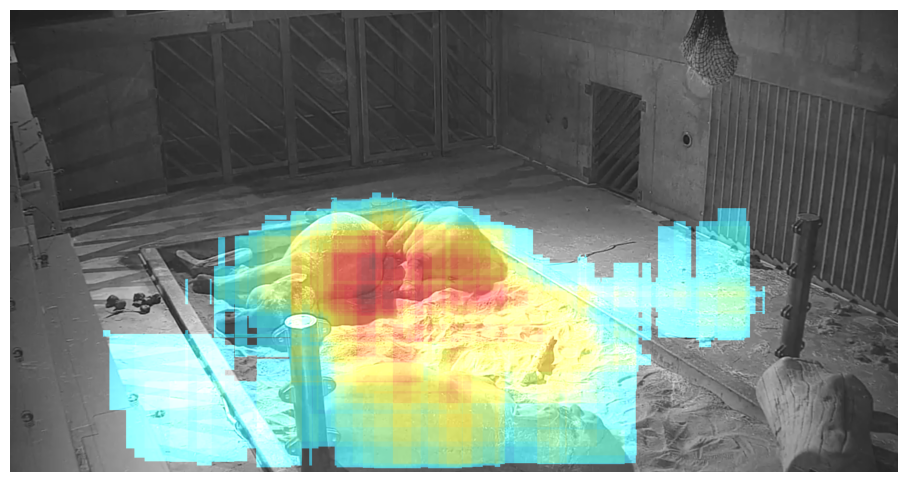

In [6]:
from visualize.heatmap import *
from visualize.read_positions import read_positions

df = read_positions(label_dir='../data_all/labels', output_csv='visualize/positions.csv')

current_time = datetime.now().time()

filtered_df = df[df['Date'].dt.time.apply(lambda x: is_within_time_window(x, current_time))]

recommended_image_heatmap = one_heatmap_background(filtered_df, [predicted_camera], recommended_image)
plot_images(recommended_image_heatmap)
